In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
from keras.datasets import  mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Convolution2D,MaxPooling2D,Flatten,Conv2D
from keras.optimizers import Adam


Using TensorFlow backend.


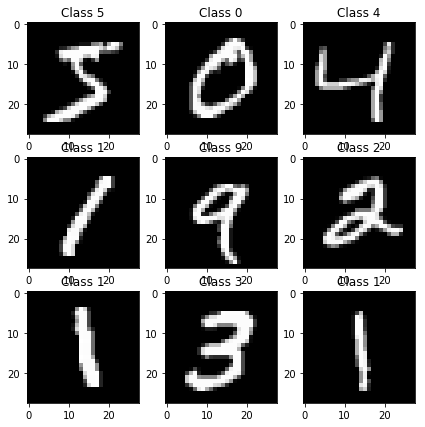

In [5]:
# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))



In [6]:

# data pre-processing，-1 represents the number of samples;1 represents the num of channels,28&28 represents the length,width respectively
X_train = X_train.reshape(-1,1,28,28)  # normalize
X_test = X_test.reshape(-1,1,28,28)    # normalize
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [7]:
#build neural network
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(1, 28, 28), padding="same"))       
model.add(Activation('relu'))
model.add(MaxPooling2D(strides=(2, 2), padding="same", pool_size=(2, 2)))

#Second Layer
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(strides=(2, 2), padding="same", pool_size=(2, 2)))

#FC
model.add(Flatten())
model.add(Dense(1024))

model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))



# Another way to define your optimize

adam=Adam(lr=1e-4)

model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1, 28, 32)         22432     
_________________________________________________________________
activation_1 (Activation)    (None, 1, 28, 32)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 32)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 14, 64)         51264     
_________________________________________________________________
activation_2 (Activation)    (None, 1, 14, 64)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 448)               0         
__________

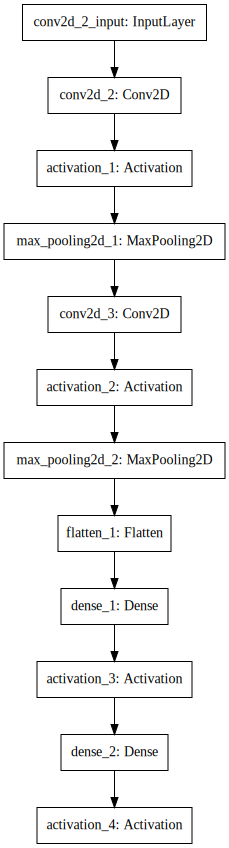

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
print(model.summary())
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [9]:

print('\nTraining-----------')
model.fit(X_train,y_train,epochs=2,batch_size=32,validation_data=(X_test, y_test))

print('\nTesting------------')
loss,accuracy=model.evaluate(X_test,y_test)


print('test loss: ', loss)
print('test accuracy: ', accuracy)


Training-----------
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 50s - loss: 0.3026 - acc: 0.9162 - val_loss: 0.1114 - val_acc: 0.9652
Epoch 2/2
60000/60000 [==============================] - 54s - loss: 0.0934 - acc: 0.9710 - val_loss: 0.0811 - val_acc: 0.9729

Testing------------
 9888/10000 [============================>.] - ETA: 0stest loss:  0.0811459477366
test accuracy:  0.9729


In [55]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
pp = model.predict_classes(X_test)
predicted_classes = np_utils.to_categorical(pp, num_classes=10)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9888/10000 [============================>.] - ETA: 0s

(99458,)
[   0    0    0 ..., 9999 9999 9999]


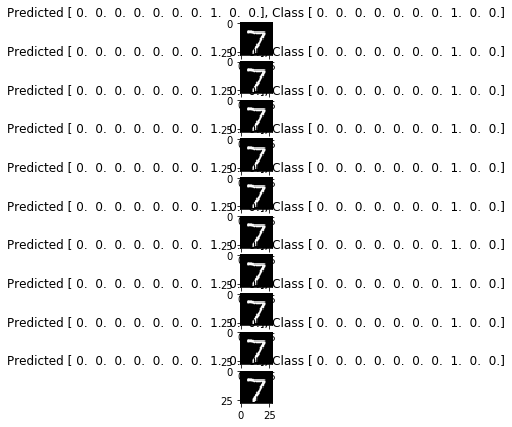

In [57]:
print(correct_indices.shape)
print(correct_indices)


plt.figure()
for i, correct in enumerate(correct_indices[:1]):
    plt.subplot(1,1,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

542


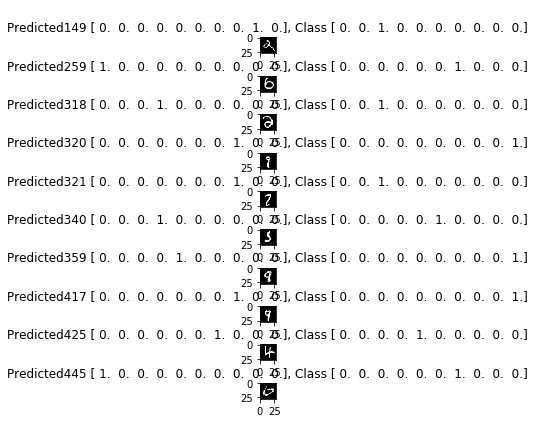

In [58]:

plt.figure()
prev = 0
print(incorrect_indices.shape[0])
v = incorrect_indices.shape[0]/2
for i, incorrect in enumerate(incorrect_indices[:20]):
    if incorrect==prev :
        continue
    else:
        prev=incorrect
    plt.subplot(20,1,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("\nPredicted{} {}, Class {}".format(incorrect,predicted_classes[incorrect], y_test[incorrect]))
